In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [2]:
news = pd.read_csv(r'C:\Users\owner\OnlineNewsPopularity\OnlineNewsPopularity.csv')

The data was found on https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [3]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
#removing the white spaces in the column names
names = []
for name in news.columns:
    name = name.replace(' ', '')
    names.append(name)
print(names)

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

In [6]:
news.columns = names

In [7]:
matrix = news.corr()

In [8]:
matrix.loc[:, 'data_channel_is_tech'].sort_values()

LDA_03                          -0.261583
data_channel_is_world           -0.247787
data_channel_is_entertainment   -0.221935
data_channel_is_bus             -0.206478
LDA_00                          -0.200416
LDA_02                          -0.179419
LDA_01                          -0.165020
kw_avg_max                      -0.161675
kw_avg_avg                      -0.140958
data_channel_is_socmed          -0.118983
rate_negative_words             -0.114082
data_channel_is_lifestyle       -0.112763
global_rate_negative_words      -0.095851
num_videos                      -0.093192
kw_max_avg                      -0.083915
num_hrefs                       -0.061734
kw_min_max                      -0.054299
kw_min_avg                      -0.050530
n_tokens_title                  -0.046716
title_subjectivity              -0.043031
abs_title_sentiment_polarity    -0.042207
kw_max_max                      -0.033972
weekday_is_sunday               -0.028467
shares                          -0

In [9]:
news.shape

(39644, 61)

# Target = Is Data Channel Tech?

# Logistic Regression

In [23]:
from sklearn.model_selection import train_test_split

lr= LogisticRegression(C=1e9)
X=news.drop(['url', 'timedelta','LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
             'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world',
            'is_weekend', 'num_imgs', 'weekday_is_thursday',  'n_unique_tokens', 'n_non_stop_unique_tokens',
            'n_non_stop_words', 'kw_max_min', 'weekday_is_monday', 'kw_avg_min', 'weekday_is_wednesday', 'abs_title_subjectivity',
            'title_subjectivity', 'abs_title_sentiment_polarity', 'kw_max_max', 'weekday_is_sunday', 'shares', 'weekday_is_friday'], 1)

Y=news['data_channel_is_tech']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=108)

fit = lr.fit(X_train, Y_train)

print('Coefficients')
print(fit.coef_)
print('\nIntercept:',fit.intercept_)
pred_y_lr = lr.predict(X_test)

print('\nAccuracy')
print(pd.crosstab(pred_y_lr, Y_test))

print('\nPercentage accuracy')
print(lr.score(X_test, Y_test))

Coefficients
[[ 2.66291025e-04  1.04217223e-04 -7.71379873e-03  9.01214849e-03
  -3.96052796e-03  5.51435684e-04  4.09998146e-03 -4.23966538e-04
  -1.32648967e-03 -1.01178295e-03 -2.23170658e-03 -1.69622194e-06
  -3.41365385e-06  1.59280743e-04 -4.64810836e-05 -1.95673309e-04
  -1.20631213e-06  1.01771600e-06  3.22244726e-06  1.21908260e-04
   7.67907147e-05  1.65321009e-04  2.04232344e-04  2.56338169e-05
  -1.36809105e-05  5.04543659e-04 -2.45120674e-04  7.07629715e-05
   5.15357844e-05  1.61476147e-04  1.67099069e-04  4.73186441e-04
  -3.02014573e-06  1.35230416e-04]]

Intercept: [0.00014254]

Accuracy
data_channel_is_tech   0.0   1.0
row_0                           
0.0                   6523  1383
1.0                     14     9

Percentage accuracy
0.8238113255139362


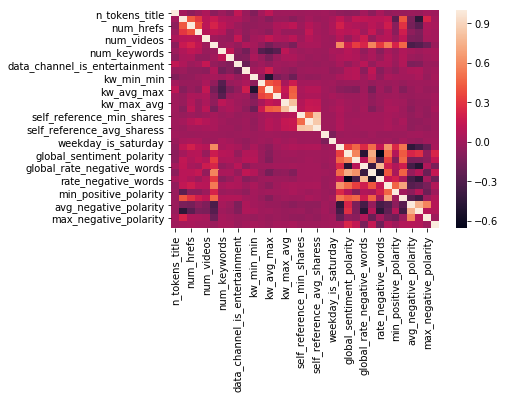

In [11]:
matrix = X_train.corr()
sns.heatmap(matrix)

# Ridge Classifier

In [29]:
ridge = linear_model.LogisticRegression(C=100)
fit = ridge.fit(X_train, Y_train)
print('Score:', ridge.score(X_test, Y_test))

print('\nCoefficients')
print(fit.coef_)
print('\nIntercept:', fit.intercept_)

pred_y_ridge = ridge.predict(X_test)
print('\nAccuracy')
print(pd.crosstab(pred_y_ridge, Y_test))


Score: 0.8234329675873376

Coefficients
[[-1.47288409e-05  6.75432130e-05 -4.24771889e-04  4.34727125e-04
  -2.03615426e-04  1.17778372e-05  1.87100762e-04 -2.02539841e-05
  -6.35164833e-05 -5.11304609e-05 -2.06945933e-03 -1.76196771e-06
  -3.37844867e-06  1.52541170e-04 -5.18986736e-05 -1.87144414e-04
  -1.33577831e-06  9.27433213e-07  3.41227338e-06  5.43469147e-06
   3.73527152e-06  6.67105393e-06  9.43049832e-06  1.11023187e-06
  -7.02954381e-07  2.20538971e-05 -1.26241510e-05  2.33998139e-06
   2.15896659e-06  5.77579962e-06  8.77524336e-06  2.38571602e-05
   2.83338869e-07  6.20760797e-06]]

Intercept: [3.86950717e-06]

Accuracy
data_channel_is_tech   0.0   1.0
row_0                           
0.0                   6520  1383
1.0                     17     9


# Lasso Regression

In [15]:
lr_one = LogisticRegression(C=100, penalty ='l1')
fit = lr_one.fit(X_train, Y_train)
print('Percentage accuracy')
print(lr_one.score(X_test, Y_test))

print('\nCoefficients')
print(fit.coef_)
print('\nIntercept:', fit.intercept_)

pred_y_lr_one = lr_one.predict(X_test)
print('\nAccuracy')
print(pd.crosstab(pred_y_lr_one, Y_test))

Percentage accuracy
0.8712321856476226

Coefficients
[[-5.68956309e-02  4.25308019e-04 -5.60463918e-02  1.23651902e-01
  -1.71853050e-01 -1.69060687e+00  1.57014726e-01 -1.18493704e+01
  -1.26963246e+01 -1.26256120e+01 -1.55572011e-03 -3.61207830e-07
  -1.29114860e-06  2.49723947e-04 -2.68013991e-06 -5.58305819e-04
  -7.19890930e-06 -3.23011189e-06  1.27465520e-05  7.39559130e-02
   2.70721345e-02  2.20003164e+00  5.36544475e-01 -2.56416626e+00
   1.00808863e+01  1.01734207e+01  7.72857137e+00 -1.46175948e+00
   1.00359505e+00  3.73566486e-01  2.77626603e-01  1.15771949e+00
   2.42918639e-01  1.07045909e-01]]

Intercept: [-1.49300515]

Accuracy
data_channel_is_tech   0.0  1.0
row_0                          
0.0                   6200  684
1.0                    337  708


In [22]:
np.unique(Y_test, return_counts=True)


(array([0., 1.]), array([6537, 1392], dtype=int64))

In this case, both Ridge and Lasso regression models were improvements on the Logistic Regression model. In all cases our sensitivity is not great, the best model, Lasso, is only able to identify 708 out of 1392 (i.e. appr. 50.8%). Our specitivity rate is much higher though: 6200 out of 6537 (app. 94.84%). Yet, this is significantly better than vanilla logistic regression that was able to correctly identify only 9 'tech data channels'.